**MID ASSIGNMENT -1**

In [1]:
import os
import math 
import statistics
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'D:/VS Code/Workspace/Mid Assignment/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:24<00:00, 200.54it/s]

50000


**Random Shuffle the dataset and plot 50 samples**

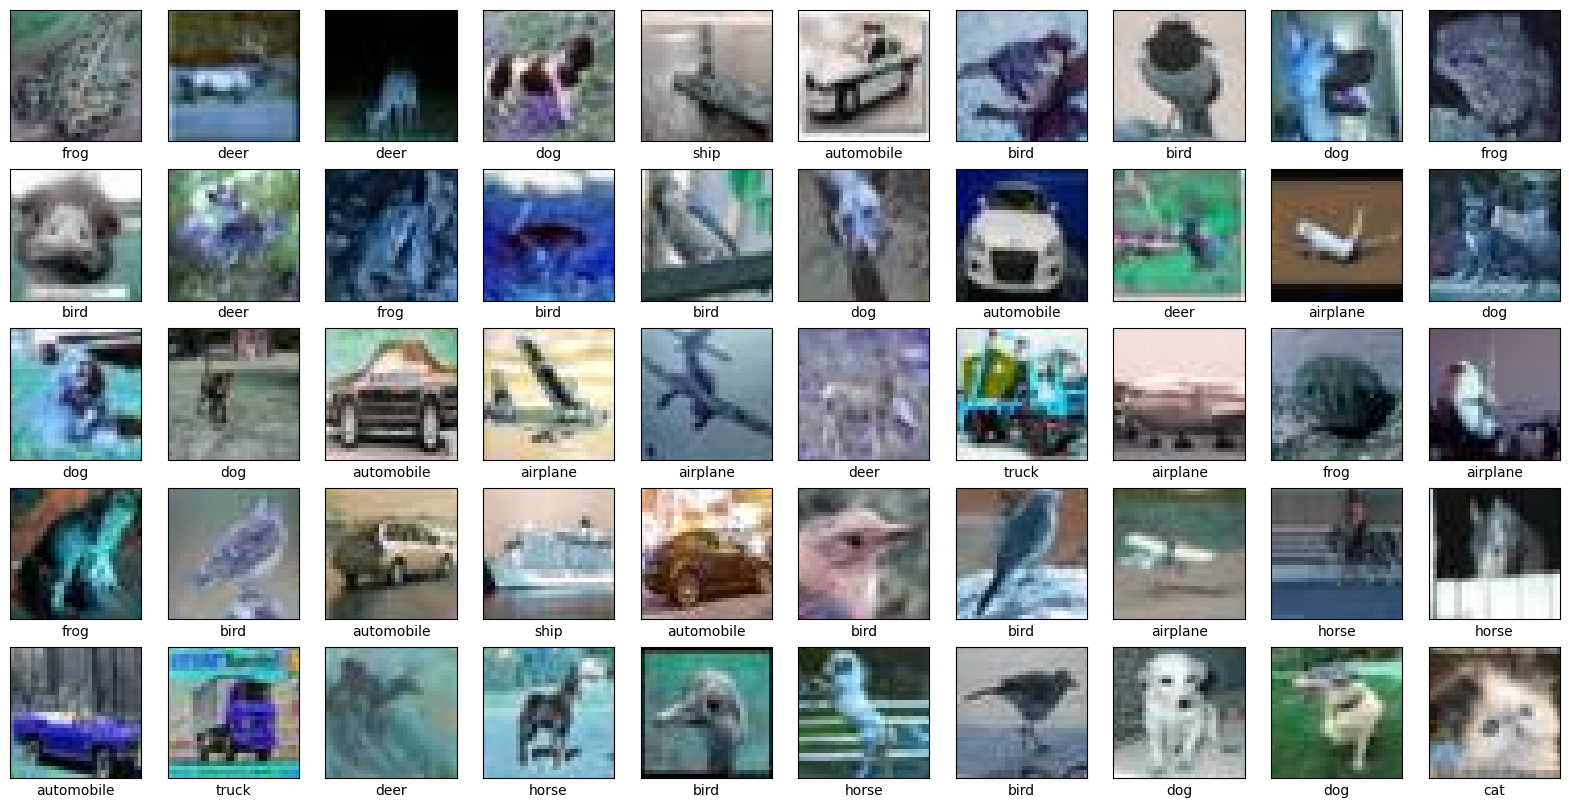

In [5]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

**Split the dataset**

In [6]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

**Calculate **Euclidean distance** for each image in each validation set and create a list with the [  *distance, training label, validation label*  ] as each element**

In [7]:
for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0
        dist1 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist1.append([l2_distance, t[1], v[1]] )
            
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
        dist2 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist2.append([l2_distance, t[1], v[1]] )       

    elif i==2:
        train = f0+f1+f3+f4
        validation = f2
        dist3 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist3.append([l2_distance, t[1], v[1]] )  

    elif i==3:
        train = f0+f1+f2+f4
        validation = f3
        dist4 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist4.append([l2_distance, t[1], v[1]] )  # Distance , Training Label , Validation Label    
          
    elif i==4:
        train = f0+f1+f2+f3
        validation = f4
        dist5 = []
        for v in tqdm(validation):
            for t in train:
                val_img = np.array(v[0])
                train_img = np.array(t[0])
                l2_distance = np.linalg.norm(val_img - train_img)
                dist5.append([l2_distance, t[1], v[1]] )    # Distance , Training Label , Validation Label           

100%|██████████| 1000/1000 [00:44<00:00, 22.33it/s]


In [24]:
print (len(dist1), len(dist2),len(dist3),len(dist4),len(dist5))

4000000 4000000 4000000 4000000 4000000


**Split the distance list for each validation set, to chunks of 4000 and take min 20 values from each chunk**

In [8]:
chunks = [dist1[i:i+4000] for i in range(0, len(dist1), 4000)]
fold1= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold1.append(top_20)

In [9]:
chunks = [dist2[i:i+4000] for i in range(0, len(dist2), 4000)]
fold2= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold2.append(top_20)

In [10]:
chunks = [dist3[i:i+4000] for i in range(0, len(dist3), 4000)]
fold3= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold3.append(top_20)

In [11]:
chunks = [dist4[i:i+4000] for i in range(0, len(dist4), 4000)]
fold4= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold4.append(top_20)

In [12]:
chunks = [dist5[i:i+4000] for i in range(0, len(dist5), 4000)]
fold5= []
for chunk in chunks:
    top_20 = sorted(chunk, key=lambda x: x[0])[:20]
    fold5.append(top_20)

In [13]:
print(len(fold1), len(fold2),len(fold3),len(fold4),len(fold5))

1000 1000 1000 1000 1000


**Predict label according to *k* value and create another list with respective *k value, predicted label and original label***

In [14]:
k_values =list(range(1, 21))
val_1=[]
val_2 =[]
val_3=[]
val_4 =[]
val_5=[]

for item in tqdm(fold1):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_1.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label
for item in tqdm(fold2):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_2.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

for item in tqdm(fold3):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_3.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

for item in tqdm(fold4):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_4.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

for item in tqdm(fold5):
    original_label = item[1][2]
    for k in k_values:
        cut= sorted(item)[:k]
        labels = [sublist[1] for sublist in cut]
        pred_label = statistics.mode(labels)
        val_5.append([k, pred_label, original_label ]) #K value , Predicted Label, Original Label

100%|██████████| 1000/1000 [00:00<00:00, 10581.18it/s]


In [15]:
print(len(val_1),len(val_2),len(val_3),len(val_4),len(val_5))

20000 20000 20000 20000 20000


**Create a dictionary with *k* values as Keys and empty lists as values**

In [16]:
k_to_accuracies= {}
for i in range(1, 21):
    k_to_accuracies[i] = []

**Calculate accuracies for each fold and insert according to *k* value *(key)* in the dictionary**

In [17]:
for k in k_values:
    count=0
    for item in val_1:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    k_to_accuracies[k].append((count/1000)*100)         
           

In [18]:
for k in k_values:
    count=0
    for item in val_2:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    k_to_accuracies[k].append((count/1000)*100) 

In [19]:
for k in k_values:
    count=0
    for item in val_3:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    k_to_accuracies[k].append((count/1000)*100) 

In [20]:
for k in k_values:
    count=0
    for item in val_4:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    k_to_accuracies[k].append((count/1000)*100) 

In [21]:
for k in k_values:
    count=0
    for item in val_5:
        if item[0] ==k:
            if item[1]== item[2]:
                count+=1
    k_to_accuracies[k].append((count/1000)*100) 

**Print all the accuracies for each *k* value**

In [22]:
k_to_accuracies

{1: [19.900000000000002, 18.9, 17.599999999999998, 18.0, 16.6],
 2: [19.900000000000002, 18.9, 17.599999999999998, 18.0, 16.6],
 3: [20.0, 19.7, 17.599999999999998, 18.4, 16.3],
 4: [20.1,
  20.200000000000003,
  18.099999999999998,
  20.200000000000003,
  16.900000000000002],
 5: [20.7, 19.7, 17.4, 19.8, 17.9],
 6: [20.0, 20.1, 17.8, 19.6, 19.1],
 7: [20.5, 20.599999999999998, 17.4, 20.8, 18.0],
 8: [20.599999999999998, 20.4, 17.7, 20.1, 18.2],
 9: [20.5, 20.9, 18.099999999999998, 20.0, 18.3],
 10: [20.200000000000003, 20.4, 18.0, 19.8, 18.5],
 11: [20.1, 20.599999999999998, 18.099999999999998, 22.0, 17.9],
 12: [20.0, 20.1, 17.9, 21.2, 16.900000000000002],
 13: [20.599999999999998, 20.3, 17.8, 20.9, 18.2],
 14: [20.7, 20.200000000000003, 17.8, 20.599999999999998, 17.599999999999998],
 15: [21.0, 20.200000000000003, 17.4, 20.4, 17.599999999999998],
 16: [19.900000000000002, 20.599999999999998, 17.8, 21.0, 18.3],
 17: [19.8, 21.7, 18.099999999999998, 20.7, 17.599999999999998],
 18: [19

**Graph Plotting**

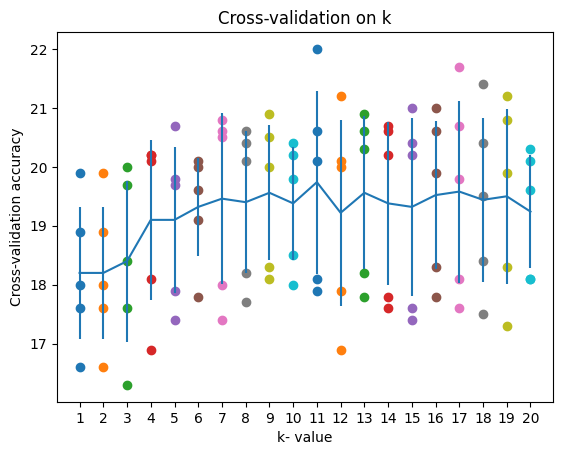

In [23]:
for k in k_values:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)
x_values = list(range(1,21))
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_values, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k- value')
plt.ylabel('Cross-validation accuracy')
plt.xticks(range(min(x_values), max(x_values)+1, 1))
plt.show()

**Discussion**

The first step was importing all the required packages. After that, all of the folder names were compiled into a list of categories and the directory for the training folder was established. To create the train data, all of the picture files included in each folder were gathered together with their corresponding class numbers. Then, 50 sample photos and their labels were produced using a randomization process applied to the train data.

In order to do cross validation, the train data was then divided into 5 sets. To save calculation time, every set has *1000* instances. After that, the distances between each picture in each validation set and the remaining train images were computed, and they were kept in a list as a list of three elements: the distance itself, the training label, and the validation label. As a result, each list included values that were *(1000 X 4000)*, or *4000000*.


In order to represent the distance values for a single validation picture, these 5 lists were then divided into chunks of *4000*. The chunks were then placed into a list, with just the top 20 minimum distance valued instances being taken from each one. The list now had a total of a thousand items, and each element contained a list of the top twenty values together with their train and validation labels.

Then, using a 'k' number between 1 and 20, the labels for each element in the list were predicted. A list including the k-value itself, the anticipated label, and the original label of the picture was then created. After that, a list was created by appending each list. There were 20X1000 items, or 20000 values, in the list. So *20* distinct labels were predicted for *20* different images using *20* k-values. The same procedure was followed for each fold.

The next step was to build a dictionary with all of the k values as keys and empty lists as values. The accuracy of each key in the dictionary was then added to each previously constructed list, and accuracy was calculated according to the k value by comparing the predicted labels with the actual labels. The same procedure was followed for each fold. The final graph was then created after printing out all the accuracy data. k values were shown on the x-axis, while accuracy data was plotted on the y-axis. Moreover, 5 accuracy values for each k-value were available, and the final line linked each of their mean values.
From the graph it can be seen that, the accuracy mean is the highest for *k=11*. 
